## Latihan PR

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
from yahoo_historical import Fetcher

In [11]:
Fetcher

yahoo_historical.fetch.Fetcher

In [13]:
get_historical()

NameError: name 'get_historical' is not defined

In [12]:
dfINDF = Fetcher('INDF.JK', [2011,1,1]).get_historical()
dfINDF

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,4950.0,4950.0,4825.0,4950.0,3838.854492,14112500.0
1,2011-01-04,5100.0,5100.0,4925.0,5100.0,3955.183105,27676500.0
2,2011-01-05,4950.0,5100.0,4950.0,4950.0,3838.854492,11431000.0
3,2011-01-06,4850.0,4950.0,4825.0,4850.0,3761.302002,14167000.0
4,2011-01-07,4725.0,4875.0,4700.0,4725.0,3664.361328,16699000.0
...,...,...,...,...,...,...,...
2302,2020-03-23,5750.0,5750.0,5350.0,5350.0,5350.000000,7765500.0
2303,2020-03-24,5350.0,5600.0,5000.0,5050.0,5050.000000,16410200.0
2304,2020-03-26,5350.0,6050.0,5250.0,5975.0,5975.000000,22194900.0
2305,2020-03-27,6050.0,6800.0,6050.0,6800.0,6800.000000,26793200.0


In [28]:
dfINDF.any().isna()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [27]:
dfINDF = dfINDF.fillna(method = 'ffill')

In [26]:
dfINDF.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,4950.0,4950.0,4825.0,4950.0,3838.854492,14112500.0
1,2011-01-04,5100.0,5100.0,4925.0,5100.0,3955.183105,27676500.0
2,2011-01-05,4950.0,5100.0,4950.0,4950.0,3838.854492,11431000.0
3,2011-01-06,4850.0,4950.0,4825.0,4850.0,3761.302002,14167000.0
4,2011-01-07,4725.0,4875.0,4700.0,4725.0,3664.361328,16699000.0


In [29]:
dfINDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 7 columns):
Date         2305 non-null object
Open         2305 non-null float64
High         2305 non-null float64
Low          2305 non-null float64
Close        2305 non-null float64
Adj Close    2305 non-null float64
Volume       2305 non-null float64
dtypes: float64(6), object(1)
memory usage: 126.2+ KB


In [30]:
dfINDF['Date'] = pd.to_datetime(dfINDF['Date'])

In [31]:
(dfINDF['Date'][0] - dfINDF['Date'][2]).days

-2

In [32]:
dfINDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 7 columns):
Date         2305 non-null datetime64[ns]
Open         2305 non-null float64
High         2305 non-null float64
Low          2305 non-null float64
Close        2305 non-null float64
Adj Close    2305 non-null float64
Volume       2305 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 126.2 KB


In [33]:
dfINDF.set_index('Date', inplace = True)

In [38]:
dfINDF

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,4950.0,4950.0,4825.0,4950.0,3838.854492,14112500.0
2011-01-04,5100.0,5100.0,4925.0,5100.0,3955.183105,27676500.0
2011-01-05,4950.0,5100.0,4950.0,4950.0,3838.854492,11431000.0
2011-01-06,4850.0,4950.0,4825.0,4850.0,3761.302002,14167000.0
2011-01-07,4725.0,4875.0,4700.0,4725.0,3664.361328,16699000.0
...,...,...,...,...,...,...
2020-03-19,6000.0,6000.0,5650.0,5650.0,5650.000000,5986200.0
2020-03-20,5650.0,6025.0,5275.0,5750.0,5750.000000,31471200.0
2020-03-23,5750.0,5750.0,5350.0,5350.0,5350.000000,7765500.0


C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


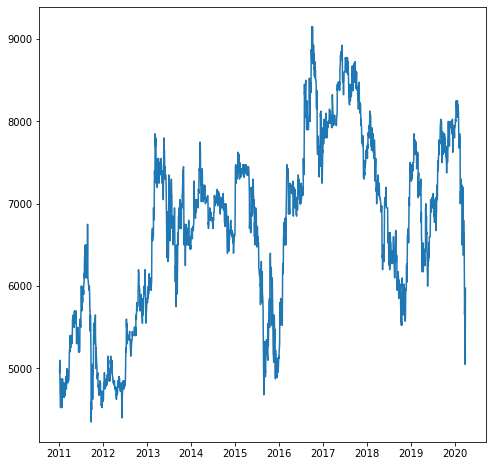

In [42]:
plt.figure(figsize = (8,8))
plt.plot(dfINDF['Close'])

Text(0.5, 1.0, 'Adj Close')

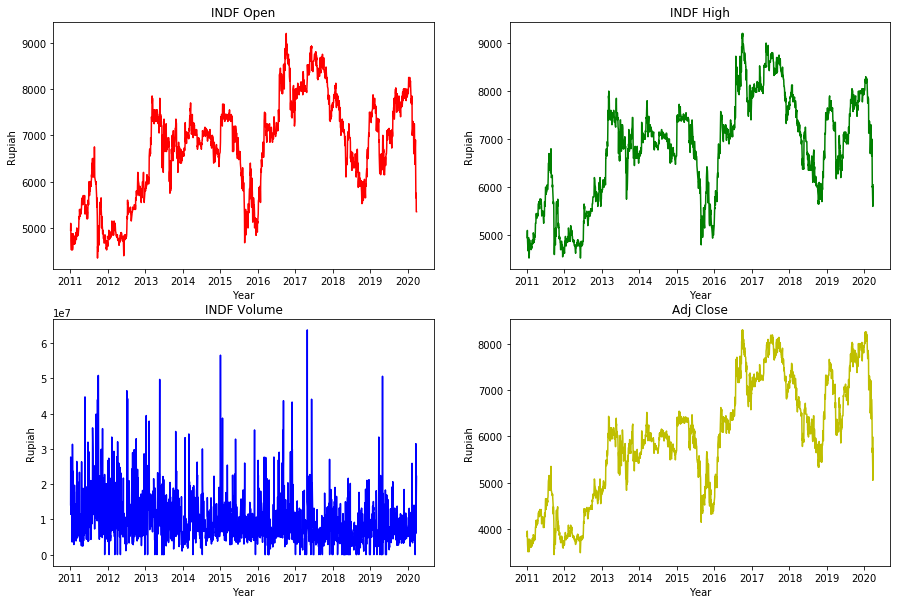

In [138]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))
axes[0][0].plot(dfINDF['Open'], color = 'r')
axes[0][0].set_title('INDF Open')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Rupiah')
axes[0][1].plot(dfINDF['High'], color = 'g')
axes[0][1].set_title('INDF High')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Rupiah')
axes[1][0].plot(dfINDF['Volume'], color = 'b')
axes[1][0].set_title('INDF Volume')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Rupiah')
axes[1][1].plot(dfINDF['Adj Close'], color = 'y')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Rupiah')
axes[1][1].set_title('Adj Close')